<a href="https://colab.research.google.com/github/marcia09maria/IA-FINANCAS/blob/main/Atividade%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
## Importação de pacotes

# Pacotes básicos para manipular dados e criar figuras

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pacotes utilizados para modelagem

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Carregando os dados

In [24]:
df = pd.read_csv('expectativa_vida_2014.csv', delimiter=';')
df.columns = df.columns.str.strip()
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,62.0,492,18.6,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Albania,2014,Developing,77.5,8,0,4.51,98.0,0,57.2,...,98,5.88,98,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Algeria,2014,Developing,75.4,11,21,0.01,95.0,0,58.4,...,95,7.21,95,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
3,Angola,2014,Developing,51.7,348,67,8.33,64.0,11699,22.7,...,68,3.31,64,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
4,Antigua and Barbuda,2014,Developing,76.2,131,0,8.56,99.0,0,47.0,...,96,5.54,99,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2014,Developing,73.9,158,9,6.47,78.0,0,61.5,...,79,5.26,78,0.1,NaN,NaN,1.6,1.5,0.771,14.2
179,Viet Nam,2014,Developing,75.9,128,28,4.09,95.0,15033,16.7,...,96,7.70,95,0.1,NaN,NaN,14.3,14.7,0.675,12.5
180,Yemen,2014,Developing,65.4,228,37,0.01,73.0,815,4.4,...,67,5.64,73,0.1,NaN,NaN,13.7,13.5,0.500,9.0
181,Zambia,2014,Developing,61.1,314,28,0.01,86.0,9,22.8,...,78,4.99,86,4.3,1738.882200,1562974.0,6.3,6.2,0.570,12.5


Inicialmente, vamos remover a coluna de ano que é igual para todas as linhas



In [25]:
df.drop(columns=['Year'], inplace=True)

Agora vamos fazer uma análise exploratória simples

In [26]:
print("Resumo estatístico:")
print(df.describe())

Resumo estatístico:
       Life expectancy  Adult Mortality  infant deaths     Alcohol  \
count       183.000000       183.000000     183.000000  182.000000   
mean         71.536612       148.688525      24.557377    3.271319   
std           8.560831       106.025532      87.045749    4.155090   
min          48.100000         1.000000       0.000000    0.010000   
25%          65.600000        66.000000       0.000000    0.010000   
50%          73.600000       135.000000       2.000000    0.320000   
75%          76.850000       216.500000      18.000000    6.700000   
max          89.000000       522.000000     957.000000   15.190000   

       Hepatitis B       Measles         BMI  under-five deaths       Polio  \
count   173.000000    183.000000  181.000000         183.000000  183.000000   
mean     83.115607   1831.207650   41.030939          32.890710   84.726776   
std      23.356649   8770.076631   21.109572         114.293045   20.868813   
min       2.000000      0.000000 

In [27]:

print("\nValores faltantes por variável:")
print(df.isna().sum())


Valores faltantes por variável:
Country                             0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             1
Hepatitis B                        10
Measles                             0
BMI                                 2
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
HIV/AIDS                            0
GDP                                28
Population                         41
thinness  1-19 years                2
thinness 5-9 years                  2
Income composition of resources    10
Schooling                          10
dtype: int64


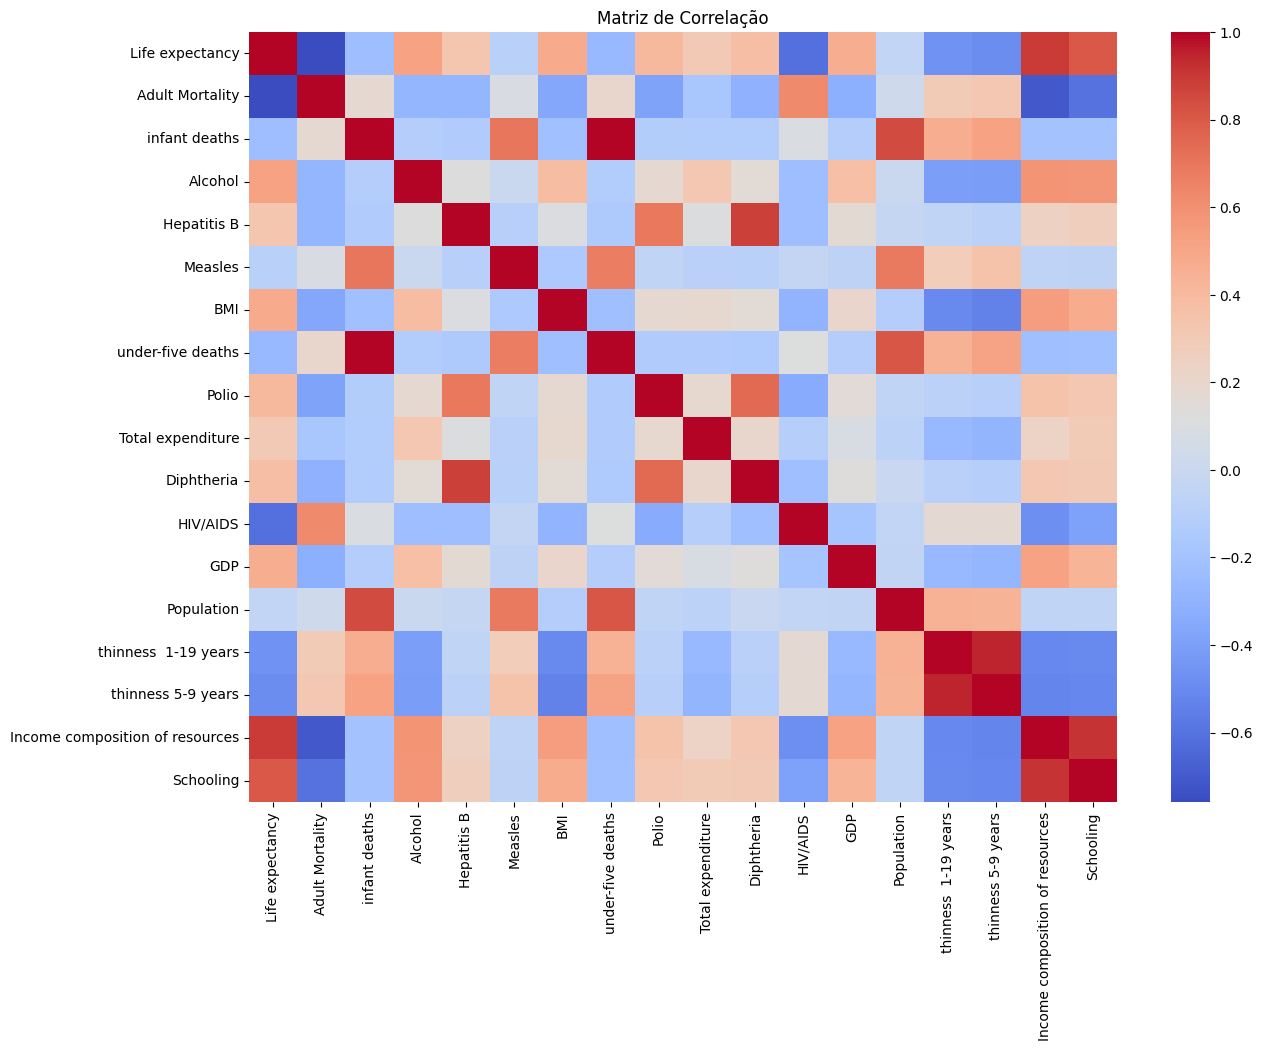

In [28]:
# Correlação apenas entre variáveis numéricas
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

Preparação dos dados para modelagem

In [29]:
# garantir que não há observações com a target (Life expectancy) ausente

df = df.dropna(subset=["Life expectancy"])

# Salvar nome do país para usar depois
paises = df["Country"]

# Transformar variável categórica 'Status' (em desenvolvimento ou desenvolvido) em dummies (0 ou 1)

df = pd.get_dummies(df, columns=["Status"], drop_first=True)

df

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,59.9,271,64,0.01,62.0,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
1,Albania,77.5,8,0,4.51,98.0,0,57.2,1,98,5.88,98,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,True
2,Algeria,75.4,11,21,0.01,95.0,0,58.4,24,95,7.21,95,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,True
3,Angola,51.7,348,67,8.33,64.0,11699,22.7,101,68,3.31,64,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,True
4,Antigua and Barbuda,76.2,131,0,8.56,99.0,0,47.0,0,96,5.54,99,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),73.9,158,9,6.47,78.0,0,61.5,10,79,5.26,78,0.1,NaN,NaN,1.6,1.5,0.771,14.2,True
179,Viet Nam,75.9,128,28,4.09,95.0,15033,16.7,35,96,7.70,95,0.1,NaN,NaN,14.3,14.7,0.675,12.5,True
180,Yemen,65.4,228,37,0.01,73.0,815,4.4,47,67,5.64,73,0.1,NaN,NaN,13.7,13.5,0.500,9.0,True
181,Zambia,61.1,314,28,0.01,86.0,9,22.8,41,78,4.99,86,4.3,1738.882200,1562974.0,6.3,6.2,0.570,12.5,True


In [30]:
# Separar target e preditores
X = df.drop(columns=["Life expectancy", "Country"])
y = df["Life expectancy"]

# Manter apenas variáveis numéricas
X_num = X.select_dtypes(include="number")

In [31]:
# Separar treino e teste
X_train, X_test, y_train, y_test, paises_train, paises_test = train_test_split(
    X_num, y, paises, test_size=0.2, random_state=42
)


In [32]:
# Imputar valores faltantes com média
imputer = SimpleImputer(strategy="mean")
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [33]:
print(X_train_imp.isna().sum())


Adult Mortality                    0
infant deaths                      0
Alcohol                            0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


Agora podemos seguir com a modelagem. Queremos prever a expectativa de vida dos países em 2014 a partir do conjunto de covariáveis dado. Vamos usar o conjunto de treino para que o modelo possa aprender padrões entre variáveis e, em seguida, vamos aplicar o modelos aos dados do conjunto de teste.

In [34]:
# Modelo linear

modelo_lr = LinearRegression()
modelo_lr.fit(X_train_imp, y_train)

# Predição
y_pred_lr = modelo_lr.predict(X_test_imp)

# Avaliação
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)
print(f"\nRegressão Linear: RMSE = {rmse:.2f} | R² = {r2:.3f}")

# 8) Exibir coeficientes com nomes
coeficientes = modelo_lr.coef_
intercepto = modelo_lr.intercept_

df_coef = pd.DataFrame({
    "Variável": X_train.columns,
    "Coeficiente": coeficientes
})
print("\nCoeficientes da Regressão Linear:")
print(df_coef.sort_values(by="Coeficiente", key=abs, ascending=False))
print(f"\nIntercepto: {intercepto:.2f}")

# 9) Tabela de comparação com país
df_comp_lr = pd.DataFrame({
    "País": paises_test.values,
    "Expectativa de Vida Real": y_test.values,
    "Expectativa de Vida Prevista": y_pred_lr
})

print("\nTabela de comparação (Regressão Linear):")
print(df_comp_lr.sort_values(by="Expectativa de Vida Real", ascending=False).head(10))


Regressão Linear: RMSE = 3.48 | R² = 0.827

Coeficientes da Regressão Linear:
                           Variável   Coeficiente
15  Income composition of resources  3.151151e+01
10                         HIV/AIDS -9.277070e-01
13             thinness  1-19 years -4.177732e-01
8                 Total expenditure  3.301125e-01
14               thinness 5-9 years  2.190145e-01
1                     infant deaths  1.396657e-01
2                           Alcohol  1.302968e-01
16                        Schooling -1.166232e-01
6                 under-five deaths -1.024784e-01
0                   Adult Mortality -1.718251e-02
9                        Diphtheria  1.605732e-02
5                               BMI -1.156167e-02
3                       Hepatitis B  8.783967e-03
7                             Polio -3.328820e-03
4                           Measles -9.090192e-05
11                              GDP  1.365360e-05
12                       Population -2.420114e-10

Intercepto: 51.41

T

Note que o sinal de algumas variáveis parece estar invertido (alcool, sarampo, escolaridade, mortalidade infantil, raquitismo). Dois problemas podem estar ocorrendo:



1.   Multicolinearidade - quando duas ou mais covariáveis são fortemente correlacionadas entre si;
2.  Falta de padronização das variáveis - algumas variáveis tem escala naturalmente pequena (polio, sarampo, pib) e outras naturalmente grande (população).

Vamos, inicialmente, investigar possíveis problemas de multicolinearidade. Em seguida, iremos padronizar as variáveis.



In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Adiciona constante para o modelo (necessário para VIF)
X_vif = sm.add_constant(X_train_imp)

# Calcula o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Exclui o intercepto da visualização
vif_data = vif_data[vif_data["Variável"] != "const"]

# Ordena por VIF decrescente
vif_data.sort_values(by="VIF", ascending=False, inplace=True)

print(vif_data)

                           Variável         VIF
2                     infant deaths  473.248603
7                 under-five deaths  380.174354
15               thinness 5-9 years   26.076160
14             thinness  1-19 years   23.390142
13                       Population   13.558472
16  Income composition of resources   10.703070
17                        Schooling    7.292794
10                       Diphtheria    4.987848
5                           Measles    3.892089
4                       Hepatitis B    3.620896
8                             Polio    3.060643
1                   Adult Mortality    2.457768
11                         HIV/AIDS    1.893844
6                               BMI    1.779127
3                           Alcohol    1.674658
12                              GDP    1.541881
9                 Total expenditure    1.289763


Quanto maior o valor do VIF maior a evidência de multicolineridade. É muito claro que as variáveis 'infant deaths' e 'under-five deaths' e 'thinness 5-9 years' e 'thinness  1-19 years' estão contribuindo com o mesmo tipo de informação. Vamos eliminar uma variável de cada par.

In [36]:
X_train_imp.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles',
       'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [37]:
colunas_para_remover = ["under-five deaths", "thinness 5-9 years"]

X_train_imp = X_train_imp.drop(columns=colunas_para_remover)
X_test_imp = X_test_imp.drop(columns=colunas_para_remover)

Também vamos escalar os dados. O StandardScaler transforma as variáveis independentes (covariávies) para média zero e desvio padrão 1. O scaling muda os coeficientes, mas não muda a relação entre as variáveis. Dessa forma, as previsões não serão afetadas. No entanto, para o modelo KNN o scaling é fundamental.

In [38]:
from sklearn.preprocessing import StandardScaler

# Instancia o scaler
scaler = StandardScaler()

# Aplica o scaler nos dados de treino e teste
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imp), columns=X_train_imp.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imp), columns=X_test_imp.columns)

# Treina novamente o modelo de regressão linear com os dados escalados
modelo_lr_scaled = LinearRegression()
modelo_lr_scaled.fit(X_train_scaled, y_train)

# Predição com os dados escalados
y_pred_lr_scaled = modelo_lr_scaled.predict(X_test_scaled)

# Avaliação do modelo escalado
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_lr_scaled))
r2_scaled = r2_score(y_test, y_pred_lr_scaled)

print(f"\nRegressão Linear (com feature scaling): RMSE = {rmse_scaled:.2f} | R² = {r2_scaled:.3f}")

# Mostrar coeficientes (para facilitar a interpretação, já que os dados estão escalados, os coeficientes indicam impacto padrão)
print(f"Intercepto: {modelo_lr_scaled.intercept_:.2f}")

df_coef_scaled = pd.DataFrame({
    "Variável": X_train_scaled.columns,
    "Coeficiente": modelo_lr_scaled.coef_
})
print("\nCoeficientes da Regressão Linear (dados escalados):")
print(df_coef_scaled.sort_values(by="Coeficiente", key=abs, ascending=False))

# Comparação Real vs Previsto
df_comp_lr = pd.DataFrame({
    "País": X_test_imp.index.map(df.set_index(X.index).loc[:, "Country"]),
    "Real": y_test,
    "Previsto": y_pred_lr
})
print("\nTabela de comparação (Regressão Linear):")
print(df_comp_lr.head())


Regressão Linear (com feature scaling): RMSE = 3.43 | R² = 0.832
Intercepto: 71.89

Coeficientes da Regressão Linear (dados escalados):
                           Variável  Coeficiente
13  Income composition of resources     4.699113
0                   Adult Mortality    -1.894886
9                          HIV/AIDS    -1.351414
11                       Population     1.216793
7                 Total expenditure     0.835698
1                     infant deaths    -0.756782
2                           Alcohol     0.542653
12             thinness  1-19 years    -0.535752
4                           Measles    -0.494268
8                        Diphtheria     0.482425
14                        Schooling    -0.383147
5                               BMI    -0.210649
10                              GDP     0.191482
3                       Hepatitis B     0.165769
6                             Polio    -0.142662

Tabela de comparação (Regressão Linear):
                    País  Real   Prev

Algumas variáveis ainda estão com sinal diferente do esperado pela literatura econômica (e bom senso). Isso significa que ainda há espaço para melhoria do modelo. O proximo modelo é o KNN. Note que voce pode ajustar quantos vizinhos quer usar no modelo. Vamos usar cinco vizinhos. Fique à vontade para testar outras combinações.

In [39]:
from sklearn.neighbors import KNeighborsRegressor

# Treina o modelo KNN com os dados escalados
modelo_knn = KNeighborsRegressor(n_neighbors=5)  # pode ajustar n_neighbors se quiser
modelo_knn.fit(X_train_scaled, y_train)

# Predição com os dados escalados
y_pred_knn = modelo_knn.predict(X_test_scaled)

# Avaliação do modelo
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"\nKNN (com feature scaling): RMSE = {rmse_knn:.2f} | R² = {r2_knn:.3f}")

# KNN não tem coeficientes nem intercepto, então só mostraremos a comparação real vs previsto

df_comp_knn = pd.DataFrame({
    "País": X_test_imp.index.map(df.set_index(X.index).loc[:, "Country"]),
    "Real": y_test,
    "Previsto": y_pred_knn
})

print("\nTabela de comparação (KNN):")
print(df_comp_knn.head())


KNN (com feature scaling): RMSE = 3.91 | R² = 0.782

Tabela de comparação (KNN):
                    País  Real  Previsto
19           Afghanistan  74.0     72.20
42               Albania  83.0     75.96
155              Algeria  58.4     61.16
111               Angola  66.4     65.86
147  Antigua and Barbuda  68.8     66.26



Árvore de Decisão (com feature scaling): RMSE = 3.76 | R² = 0.799

Tabela de comparação (Árvore de Decisão):
                    País  Real  Previsto
19           Afghanistan  74.0    69.400
42               Albania  83.0    82.425
155              Algeria  58.4    52.100
111               Angola  66.4    71.400
147  Antigua and Barbuda  68.8    66.950


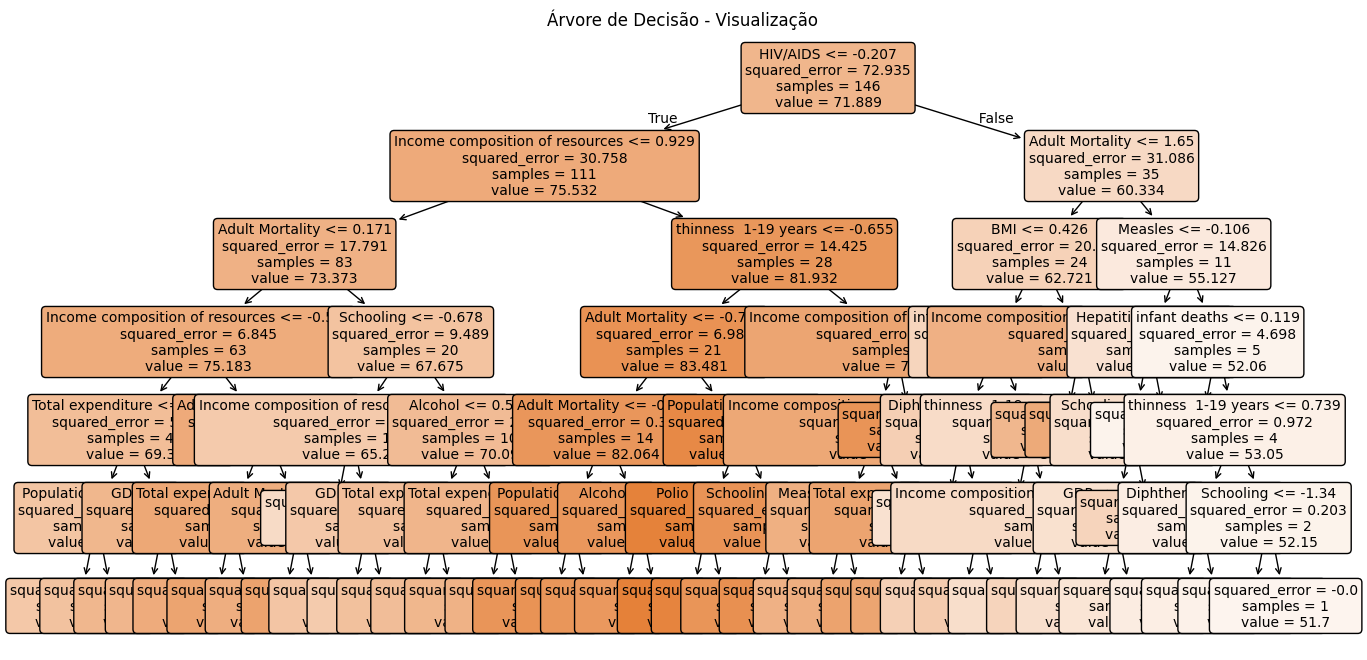

In [49]:
#TESTE PARA VER QUAL ARQUIVO VAI SER SALVO. ESTE É O FEITO NO FINAL DE SEMANA
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Treina o modelo de árvore de decisão com dados escalados, com 6 foi o menor RMSE. O RMSE indica, em média, o quão distante estão as previsões do modelo em relação aos valores reais, na mesma escala das variáveis preditas.3,76 Significa que, em média, a diferença entre as previsões da árvore de decisão e os valores reais é de aproximadamente 3,76 unidades. Quanto menor o RMSE, melhor o modelo está em capturar os padrões dos dados e em minimizar os erros de previsão.

modelo_tree = DecisionTreeRegressor(random_state=42, max_depth=6)  # limite a profundidade para facilitar visualização
modelo_tree.fit(X_train_scaled, y_train)

# Predição com os dados escalados
y_pred_tree = modelo_tree.predict(X_test_scaled)

# Avaliação do modelo
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print(f"\nÁrvore de Decisão (com feature scaling): RMSE = {rmse_tree:.2f} | R² = {r2_tree:.3f}")

# Comparação Real vs Previsto
df_comp_tree = pd.DataFrame({
    "País": X_test_imp.index.map(df.set_index(X.index).loc[:, "Country"]),
    "Real": y_test,
    "Previsto": y_pred_tree
})

print("\nTabela de comparação (Árvore de Decisão):")
print(df_comp_tree.head())

# Plot da árvore
plt.figure(figsize=(16,8))
plot_tree(modelo_tree, feature_names=X_train_scaled.columns, filled=True, rounded=True, fontsize=10)
plt.title("Árvore de Decisão - Visualização")
plt.show()


Por fim, vamos usar o random forest. Esse modelo é bem mais complexo que os anteriores e, por isso, consegue captar padrões mais sutis entre as variáveis. Abaixo, uma sugestão de configuração do modelo. Voce pode mexer nesses parâmetros para tentar obter resultados melhores.

In [41]:
# Modelo Random Forest
modelo_rf = RandomForestRegressor(
    n_estimators=100,         # número de árvores da floresta
    max_depth=10 ,            # limita a profundidade (evita overfitting)
    min_samples_split=5,     # exige pelo menos 10 amostras para dividir um nó
    min_samples_leaf=3,       # exige pelo menos 3 amostras por folha
    max_features="sqrt",      # usa raiz quadrada do número total de variáveis em cada split
    bootstrap=True,           # usa amostragem com reposição
    random_state=42           # resultado replicável
)
modelo_rf.fit(X_train_imp, y_train)

# Predição no conjunto de teste
y_pred_rf = modelo_rf.predict(X_test_imp)

# Avaliação
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest: RMSE = {rmse_rf:.2f} | R² = {r2_rf:.3f}")

# Comparação Real vs Previsto
df_comp_tree = pd.DataFrame({
    "País": X_test_imp.index.map(df.set_index(X.index).loc[:, "Country"]),
    "Real": y_test,
    "Previsto": y_pred_rf
})

print("\nTabela de comparação (Árvore de Decisão):")
print(df_comp_tree.head())



Random Forest: RMSE = 2.78 | R² = 0.890

Tabela de comparação (Árvore de Decisão):
                    País  Real   Previsto
19           Afghanistan  74.0  73.340868
42               Albania  83.0  79.749829
155              Algeria  58.4  63.016021
111               Angola  66.4  65.944568
147  Antigua and Barbuda  68.8  68.106944


Comparativo dos modelos

In [42]:
resultados_modelos = pd.DataFrame({
    "Modelo": ["Regressão Linear", "KNN", "Árvore de Decisão", "Random Forest"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr_scaled)),
        np.sqrt(mean_squared_error(y_test, y_pred_knn)),
        np.sqrt(mean_squared_error(y_test, y_pred_tree)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "R²": [
        r2_score(y_test, y_pred_lr_scaled),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_tree),
        r2_score(y_test, y_pred_rf)
    ]
})

# Ordenar do melhor para o pior RMSE
resultados_modelos.sort_values(by="RMSE", ascending=True, inplace=True)

print("\nComparativo de Modelos:")
print(resultados_modelos)


Comparativo de Modelos:
              Modelo      RMSE        R²
3      Random Forest  2.781538  0.889903
0   Regressão Linear  3.433392  0.832254
1                KNN  3.914094  0.781994
2  Árvore de Decisão  4.238216  0.744393


<ipython-input-43-1180200911>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Modelo", data=resultados_modelos, palette="viridis")
<ipython-input-43-1180200911>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R²", y="Modelo", data=resultados_modelos, palette="magma")


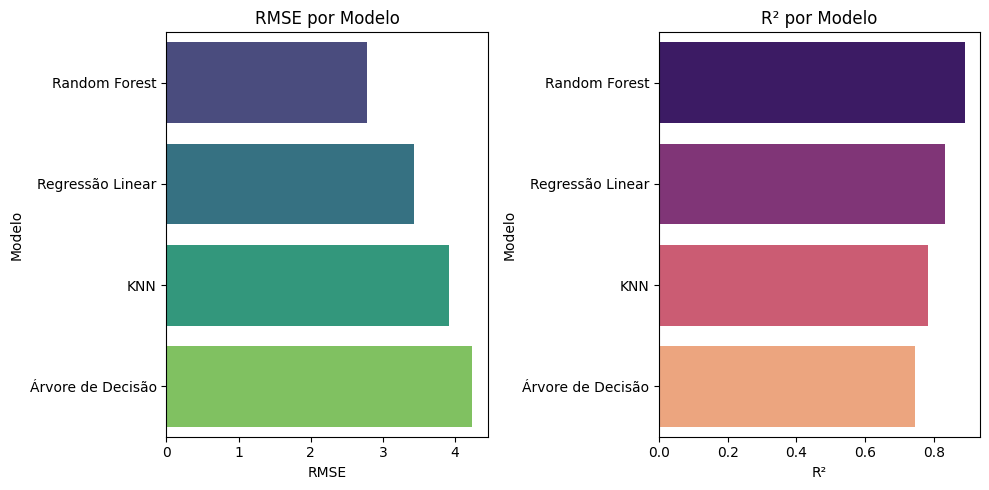

In [43]:
plt.figure(figsize=(10, 5))

# RMSE
plt.subplot(1, 2, 1)
sns.barplot(x="RMSE", y="Modelo", data=resultados_modelos, palette="viridis")
plt.title("RMSE por Modelo")

# R²
plt.subplot(1, 2, 2)
sns.barplot(x="R²", y="Modelo", data=resultados_modelos, palette="magma")
plt.title("R² por Modelo")

plt.tight_layout()
plt.show()
